<font size=8>**Required skills appearing in US data job postings**<font>

**Importing the necessary libraries and cleaning the dataframe**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [55]:
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\vbali\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Jul 24 13:39:16 2024).


In [56]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [57]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**Filtering for US job postings**

In [58]:
df_us = df[df['job_country']=='United States']

**Exploding the column 'job_skills' from a list to be able to do further analysis**

In [59]:
df_skills=df_us.explode('job_skills')

In [60]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


**Grouping the dataframe by job skills and counting their occurences in job postings**

In [61]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count=df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


**Defining the top 3 Data roles**

In [62]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [63]:
df_jobs_total = df_us['job_title_short'].value_counts().reset_index(name='post_total').head(3)

**Defining the occurance percentage per skill out of fields 'skill_count' and 'jobs_total'**

In [64]:
df_skills_perc = pd.merge(df_skills_count, df_jobs_total, on='job_title_short', how='left')
df_skills_perc.sort_values(by='post_total',ascending=False)
df_skills_perc['skill_perc'] = (df_skills_perc['skill_count'] / df_skills_perc['post_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,post_total,skill_perc
0,python,Data Scientist,42379,58830.0,72.036376
1,sql,Data Analyst,34452,67816.0,50.802171
2,sql,Data Scientist,30034,58830.0,51.052184
3,excel,Data Analyst,27519,67816.0,40.578919
4,r,Data Scientist,26022,58830.0,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,NaN,NaN
1866,vb.net,Senior Data Scientist,1,NaN,NaN
1867,fortran,Machine Learning Engineer,1,NaN,NaN
1868,planner,Cloud Engineer,1,NaN,NaN


**Visualizing the dataframe with a bar plot**

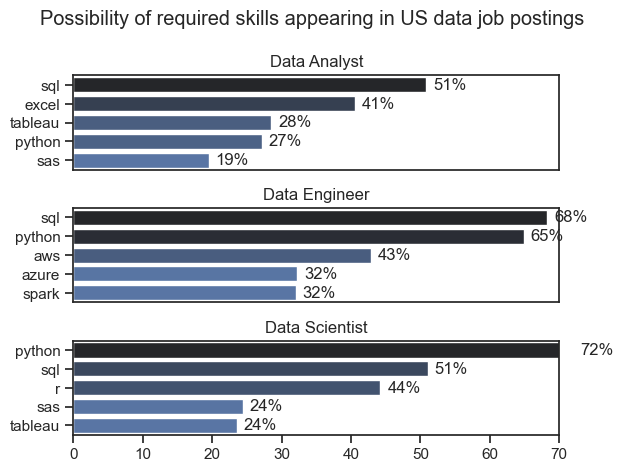

In [65]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', hue='skill_count', ax=ax[i], palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)
    if i != len(job_titles)-1:
        ax[i].set_xticks([])
    for x, y in enumerate(df_plot['skill_perc']):
        ax[i].text(y+1, x, f'{y:.0f}%', va='center')
plt.suptitle('Possibility of required skills appearing in US data job postings')
plt.tight_layout()